# **Opinion Classification of IMDB Movie Reviews** 

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences,np_utils
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import LSTM, GRU,SimpleRNN
from keras.layers.core import Dropout
import seaborn as sns 
import re
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# reading our training dataset
df_train = pd.read_csv(r"Data\train.csv")
df_train.head()

text sentiment
0  Now, I won't deny that when I purchased this o...       neg
1  The saddest thing about this "tribute" is that...       neg
2  Last night I decided to watch the prequel or s...       neg
3  I have to admit that i liked the first half of...       neg
4  I was not impressed about this film especially...       neg

In [3]:
# number of rows in our dataset
len(df_train)

25000

In [4]:
# number of columns in the training dataset
df_train.columns

Index(['text', 'sentiment'], dtype='object')

In [5]:
# reading the testing dataset
df_test = pd.read_csv(r"Data\test.csv")
df_test.head()

text sentiment
0  My daughter liked it but I was aghast, that a ...       neg
1  I... No words. No words can describe this. I w...       neg
2  this film is basically a poor take on the old ...       neg
3  This is a terrible movie, and I'm not even sur...       neg
4  First of all this movie is a piece of reality ...       pos

In [6]:
len(df_test)

25000

In [7]:
# merging the training and testing set to preprocess the dataset
df = df_train.append(df_test)
df.head()

text sentiment
0  Now, I won't deny that when I purchased this o...       neg
1  The saddest thing about this "tribute" is that...       neg
2  Last night I decided to watch the prequel or s...       neg
3  I have to admit that i liked the first half of...       neg
4  I was not impressed about this film especially...       neg

In [8]:
# length of merged dataframe
len(df)

50000

In [9]:
# checking for null values in the dataset
df.isnull().any()

text         False
sentiment    False
dtype: bool

<AxesSubplot:>

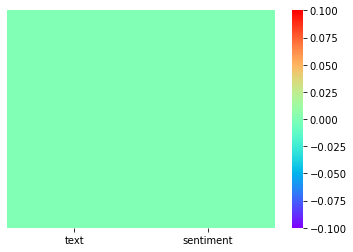

In [10]:
# checking for null values through visualization
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)

In [11]:
# our target column is 'sentiment'
df['sentiment'].head(15)

0     neg
1     neg
2     neg
3     neg
4     neg
5     pos
6     pos
7     neg
8     pos
9     neg
10    neg
11    neg
12    neg
13    neg
14    neg
Name: sentiment, dtype: object

In [12]:
# using the label binarizer to encode it into 1 and 0
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])
df['sentiment'].head(15)

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
Name: sentiment, dtype: int32

In [13]:
# our dataset has been transformed to
df.head(10)

text  sentiment
0  Now, I won't deny that when I purchased this o...          0
1  The saddest thing about this "tribute" is that...          0
2  Last night I decided to watch the prequel or s...          0
3  I have to admit that i liked the first half of...          0
4  I was not impressed about this film especially...          0
5  The original movie, The Odd Couple, has some w...          1
6  This was a great movie with a good cast, all o...          1
7  I'm a sucker for a good romance, but this one ...          0
8  Fast-paced, funny, sexy, and spectacular. Cagn...          1
9  The proverb "Never judge a book by it's cover"...          0

## **Data Preprocessing**

### **Conversion of text from uppercase to lowercase**

In [14]:
# using the lower() function to convert the text of the 'text' column to convert it into lowercase
df['text'] = df['text'].str.lower()
df['text'].head(10)

0    now, i won't deny that when i purchased this o...
1    the saddest thing about this "tribute" is that...
2    last night i decided to watch the prequel or s...
3    i have to admit that i liked the first half of...
4    i was not impressed about this film especially...
5    the original movie, the odd couple, has some w...
6    this was a great movie with a good cast, all o...
7    i'm a sucker for a good romance, but this one ...
8    fast-paced, funny, sexy, and spectacular. cagn...
9    the proverb "never judge a book by it's cover"...
Name: text, dtype: object

### **Removal of Newline characters with white spaces**

In [15]:
# using the replace function of string to replace the newline character with white spaces
df['text'] = df['text'].str.replace(r'\n',' ')
df['text'].head(10)

0    now, i won't deny that when i purchased this o...
1    the saddest thing about this "tribute" is that...
2    last night i decided to watch the prequel or s...
3    i have to admit that i liked the first half of...
4    i was not impressed about this film especially...
5    the original movie, the odd couple, has some w...
6    this was a great movie with a good cast, all o...
7    i'm a sucker for a good romance, but this one ...
8    fast-paced, funny, sexy, and spectacular. cagn...
9    the proverb "never judge a book by it's cover"...
Name: text, dtype: object

In [16]:
# removing the long white spaces with single whitespace
df['text'] = df['text'].str.replace(r'\s+',' ')
df['text'].head(15)

0     now, i won't deny that when i purchased this o...
1     the saddest thing about this "tribute" is that...
2     last night i decided to watch the prequel or s...
3     i have to admit that i liked the first half of...
4     i was not impressed about this film especially...
5     the original movie, the odd couple, has some w...
6     this was a great movie with a good cast, all o...
7     i'm a sucker for a good romance, but this one ...
8     fast-paced, funny, sexy, and spectacular. cagn...
9     the proverb "never judge a book by it's cover"...
10    i'm guessing the writers have never read a boo...
11    even if you're a huge sandler fan, please don'...
12    my kids picked this out at the video store...i...
13    a little girl's dead body is found stripped of...
14    this is indeed a god adaptation of jane austen...
Name: text, dtype: object

### **Removal of URLs**

In [17]:
# replacing urls  BY 'Links'
df['text']=df['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
df['text'].head(10)

0    now, i won't deny that when i purchased this o...
1    the saddest thing about this "tribute" is that...
2    last night i decided to watch the prequel or s...
3    i have to admit that i liked the first half of...
4    i was not impressed about this film especially...
5    the original movie, the odd couple, has some w...
6    this was a great movie with a good cast, all o...
7    i'm a sucker for a good romance, but this one ...
8    fast-paced, funny, sexy, and spectacular. cagn...
9    the proverb "never judge a book by it's cover"...
Name: text, dtype: object

### **Removal of special characters**


In [18]:
# replacing special characters with white spaces
df['text'] = df['text'].str.replace(r"[^a-zA-Z0-9]+"," ")
df['text'].head(15)

0     now i won t deny that when i purchased this of...
1     the saddest thing about this tribute is that a...
2     last night i decided to watch the prequel or s...
3     i have to admit that i liked the first half of...
4     i was not impressed about this film especially...
5     the original movie the odd couple has some won...
6     this was a great movie with a good cast all of...
7     i m a sucker for a good romance but this one d...
8     fast paced funny sexy and spectacular cagney i...
9     the proverb never judge a book by it s cover w...
10    i m guessing the writers have never read a boo...
11    even if you re a huge sandler fan please don t...
12    my kids picked this out at the video store it ...
13    a little girl s dead body is found stripped of...
14    this is indeed a god adaptation of jane austen...
Name: text, dtype: object

### **Tokenization**

In [19]:
# sample way to tokenize a string
temp = "hello there i am prakhar"
re.findall("[\w]+",temp)

['hello', 'there', 'i', 'am', 'prakhar']

In [20]:
# applying tokenization on dataset
# our target column is 'text'
df['text'].head()

0    now i won t deny that when i purchased this of...
1    the saddest thing about this tribute is that a...
2    last night i decided to watch the prequel or s...
3    i have to admit that i liked the first half of...
4    i was not impressed about this film especially...
Name: text, dtype: object

In [21]:
tokenized_text = []
tokenized_text = df.apply(lambda row: re.findall("[\w]+",row['text']),axis=1)
tokenized_text

0        [now, i, won, t, deny, that, when, i, purchase...
1        [the, saddest, thing, about, this, tribute, is...
2        [last, night, i, decided, to, watch, the, preq...
3        [i, have, to, admit, that, i, liked, the, firs...
4        [i, was, not, impressed, about, this, film, es...
                               ...                        
24995    [for, one, thing, he, produced, this, movie, i...
24996    [the, title, comes, from, an, alteration, an, ...
24997    [christopher, nolan, s, first, film, is, a, no...
24998    [the, story, is, shortly, about, the, faith, l...
24999    [i, found, parts, of, this, movie, rather, slo...
Length: 50000, dtype: object

In [22]:
tokenized_text = np.array((tokenized_text))
tokenized_text

array([list(['now', 'i', 'won', 't', 'deny', 'that', 'when', 'i', 'purchased', 'this', 'off', 'ebay', 'i', 'had', 'high', 'expectations', 'this', 'was', 'an', 'incredible', 'out', 'of', 'print', 'work', 'from', 'the', 'master', 'of', 'comedy', 'that', 'i', 'so', 'enjoy', 'however', 'i', 'was', 'soon', 'to', 'be', 'disappointed', 'apologies', 'to', 'those', 'who', 'enjoyed', 'it', 'but', 'i', 'just', 'found', 'the', 'compleat', 'al', 'to', 'be', 'very', 'difficult', 'to', 'watch', 'i', 'got', 'a', 'few', 'smiles', 'sure', 'but', 'the', 'majority', 'of', 'the', 'funny', 'came', 'from', 'the', 'music', 'videos', 'which', 'i', 've', 'got', 'on', 'dvd', 'and', 'the', 'rest', 'was', 'basically', 'filler', 'you', 'could', 'tell', 'that', 'this', 'was', 'not', 'al', 's', 'greatest', 'video', 'achievement', 'that', 'honor', 'goes', 'to', 'uhf', 'honestly', 'i', 'doubt', 'if', 'this', 'will', 'ever', 'make', 'the', 'jump', 'to', 'dvd', 'so', 'if', 'you', 're', 'an', 'ultra', 'hardcore', 'al', 'f

In [23]:
# row 1 after tokenization
tokenized_text[0]

['now',
 'i',
 'won',
 't',
 'deny',
 'that',
 'when',
 'i',
 'purchased',
 'this',
 'off',
 'ebay',
 'i',
 'had',
 'high',
 'expectations',
 'this',
 'was',
 'an',
 'incredible',
 'out',
 'of',
 'print',
 'work',
 'from',
 'the',
 'master',
 'of',
 'comedy',
 'that',
 'i',
 'so',
 'enjoy',
 'however',
 'i',
 'was',
 'soon',
 'to',
 'be',
 'disappointed',
 'apologies',
 'to',
 'those',
 'who',
 'enjoyed',
 'it',
 'but',
 'i',
 'just',
 'found',
 'the',
 'compleat',
 'al',
 'to',
 'be',
 'very',
 'difficult',
 'to',
 'watch',
 'i',
 'got',
 'a',
 'few',
 'smiles',
 'sure',
 'but',
 'the',
 'majority',
 'of',
 'the',
 'funny',
 'came',
 'from',
 'the',
 'music',
 'videos',
 'which',
 'i',
 've',
 'got',
 'on',
 'dvd',
 'and',
 'the',
 'rest',
 'was',
 'basically',
 'filler',
 'you',
 'could',
 'tell',
 'that',
 'this',
 'was',
 'not',
 'al',
 's',
 'greatest',
 'video',
 'achievement',
 'that',
 'honor',
 'goes',
 'to',
 'uhf',
 'honestly',
 'i',
 'doubt',
 'if',
 'this',
 'will',
 'ever

### **Stop word removal**

In [24]:
# downloading the stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Prakhar
[nltk_data]     Jadaun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# printing the stop words in english
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [26]:
stop_words_removed = []
for i in range(len(tokenized_text)):
    row = []
    for j in range(len(tokenized_text[i])):
        if(tokenized_text[i][j] not in stop_words):
            row.append(tokenized_text[i][j])
    stop_words_removed.append(row)
    
stop_words_removed

[['deny',
  'purchased',
  'ebay',
  'high',
  'expectations',
  'incredible',
  'print',
  'work',
  'master',
  'comedy',
  'enjoy',
  'however',
  'soon',
  'disappointed',
  'apologies',
  'enjoyed',
  'found',
  'compleat',
  'al',
  'difficult',
  'watch',
  'got',
  'smiles',
  'sure',
  'majority',
  'funny',
  'came',
  'music',
  'videos',
  'got',
  'dvd',
  'rest',
  'basically',
  'filler',
  'could',
  'tell',
  'al',
  'greatest',
  'video',
  'achievement',
  'honor',
  'goes',
  'uhf',
  'honestly',
  'doubt',
  'ever',
  'make',
  'jump',
  'dvd',
  'ultra',
  'hardcore',
  'al',
  'fan',
  'everything',
  'buy',
  'tape',
  'ebay',
  'pay',
  'much'],
 ['saddest',
  'thing',
  'tribute',
  'almost',
  'singers',
  'including',
  'otherwise',
  'incredibly',
  'talented',
  'nick',
  'cave',
  'seem',
  'missed',
  'whole',
  'point',
  'cohen',
  'intensity',
  'lies',
  'delivering',
  'lines',
  'almost',
  'tuneless',
  'poise',
  'cohen',
  'transmits',
  'full',

In [27]:
type(stop_words_removed)

list

## **Lemmatization**

In [28]:
# initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

In [29]:
# we have to perform lemmatization to the output of the stop words process
stop_words_removed

[['deny',
  'purchased',
  'ebay',
  'high',
  'expectations',
  'incredible',
  'print',
  'work',
  'master',
  'comedy',
  'enjoy',
  'however',
  'soon',
  'disappointed',
  'apologies',
  'enjoyed',
  'found',
  'compleat',
  'al',
  'difficult',
  'watch',
  'got',
  'smiles',
  'sure',
  'majority',
  'funny',
  'came',
  'music',
  'videos',
  'got',
  'dvd',
  'rest',
  'basically',
  'filler',
  'could',
  'tell',
  'al',
  'greatest',
  'video',
  'achievement',
  'honor',
  'goes',
  'uhf',
  'honestly',
  'doubt',
  'ever',
  'make',
  'jump',
  'dvd',
  'ultra',
  'hardcore',
  'al',
  'fan',
  'everything',
  'buy',
  'tape',
  'ebay',
  'pay',
  'much'],
 ['saddest',
  'thing',
  'tribute',
  'almost',
  'singers',
  'including',
  'otherwise',
  'incredibly',
  'talented',
  'nick',
  'cave',
  'seem',
  'missed',
  'whole',
  'point',
  'cohen',
  'intensity',
  'lies',
  'delivering',
  'lines',
  'almost',
  'tuneless',
  'poise',
  'cohen',
  'transmits',
  'full',

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Prakhar
[nltk_data]     Jadaun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
lemmatized_word = []
for i in range(len(stop_words_removed)):
    lsttemp = []
    for j in range(len(stop_words_removed[i])):
        lsttemp.append(lemmatizer.lemmatize(stop_words_removed[i][j]))
    lemmatized_word.append(lsttemp)

In [32]:
lemmatized_word

[['deny',
  'purchased',
  'ebay',
  'high',
  'expectation',
  'incredible',
  'print',
  'work',
  'master',
  'comedy',
  'enjoy',
  'however',
  'soon',
  'disappointed',
  'apology',
  'enjoyed',
  'found',
  'compleat',
  'al',
  'difficult',
  'watch',
  'got',
  'smile',
  'sure',
  'majority',
  'funny',
  'came',
  'music',
  'video',
  'got',
  'dvd',
  'rest',
  'basically',
  'filler',
  'could',
  'tell',
  'al',
  'greatest',
  'video',
  'achievement',
  'honor',
  'go',
  'uhf',
  'honestly',
  'doubt',
  'ever',
  'make',
  'jump',
  'dvd',
  'ultra',
  'hardcore',
  'al',
  'fan',
  'everything',
  'buy',
  'tape',
  'ebay',
  'pay',
  'much'],
 ['saddest',
  'thing',
  'tribute',
  'almost',
  'singer',
  'including',
  'otherwise',
  'incredibly',
  'talented',
  'nick',
  'cave',
  'seem',
  'missed',
  'whole',
  'point',
  'cohen',
  'intensity',
  'lie',
  'delivering',
  'line',
  'almost',
  'tuneless',
  'poise',
  'cohen',
  'transmits',
  'full',
  'extent

## **Implementing the model**

In [33]:
# converting the  lemmatized words list to numpy ndarray
x = np.array(lemmatized_word)
x.shape

(50000,)

In [34]:
# storing our target column 'sentiment' in y
y = np.array(df['sentiment'].array)
y

array([0, 0, 0, ..., 1, 0, 1])

In [35]:
# shape of y
y.shape

(50000,)

In [36]:
# resizing the target y
y = np.resize(y,(50000,1))
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [37]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.1)

In [38]:
X_train.shape

(45000,)

In [39]:
y_train.shape

(45000, 1)

In [40]:
X_test.shape

(5000,)

In [41]:
y_test.shape

(5000, 1)

In [42]:
# performing tokenization
top_words = 20000 
maxlen = 100 
batch_size = 32
nb_classes = 2
nb_ep = 2


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(X_train)

In [43]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [44]:
X_train_seq = pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = pad_sequences(sequences_test, maxlen=maxlen)

In [45]:
# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

In [46]:
print('X_train shape:', X_train_seq.shape) 
print('X_test shape:', X_test_seq.shape) 
print('y_train shape:', y_train_seq.shape) 
print('y_test shape:', y_test_seq.shape)

X_train shape: (45000, 100)
X_test shape: (5000, 100)
y_train shape: (45000, 2)
y_test shape: (5000, 2)


## **LSTM implementation**

In [47]:
model1 = Sequential()

In [48]:
# model1.add(Dropout(rate=0.2))

In [49]:
model1.add(Embedding(top_words, 128))

In [50]:
model1.add(LSTM(128)) 

In [51]:
model1.add(Dense(nb_classes))

In [52]:
model1.add(Activation('softmax'))

In [53]:
# Compile LSTM
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_ep, verbose=1)

Epoch 1/2
1407/1407 [==============================] - 232s 162ms/step - loss: 0.3334 - accuracy: 0.8567
Epoch 2/2
1407/1407 [==============================] - 227s 162ms/step - loss: 0.1950 - accuracy: 0.9258


In [56]:
# Model evluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

157/157 [==============================] - 5s 31ms/step - loss: 0.2960 - accuracy: 0.8848
Test loss : 0.2960
Test accuracy : 0.8848


## **Implementing GRU** 

In [58]:
model2 = Sequential()

In [59]:
model2.add(Embedding(top_words, 128))

In [60]:
model2.add(GRU(128)) 

In [61]:
model2.add(Dense(nb_classes))

In [62]:
model2.add(Activation('softmax'))

In [63]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
model2.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_ep, verbose=1)

Epoch 1/2
1407/1407 [==============================] - 190s 134ms/step - loss: 0.3374 - accuracy: 0.8510
Epoch 2/2
1407/1407 [==============================] - 218s 155ms/step - loss: 0.1759 - accuracy: 0.9341


In [65]:
# Model evluation
score = model2.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

157/157 [==============================] - 9s 52ms/step - loss: 0.2669 - accuracy: 0.8924
Test loss : 0.2669
Test accuracy : 0.8924
